In [3]:
#Binary classification of the titanic dataset - did a passanger survive or not
#datasets come from kaggle.com. Check out their datasets and competitons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
train = pd.read_csv('titanic_train.csv')

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


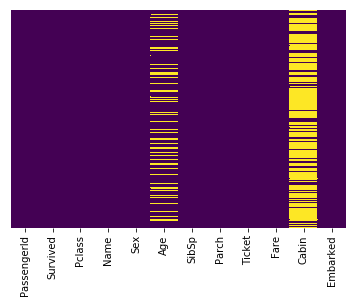

In [61]:
#Check where the missing data is
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

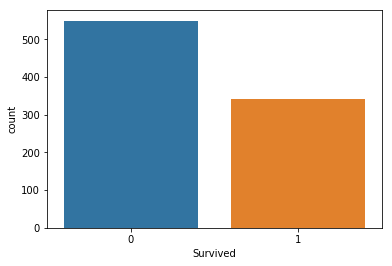

In [62]:
#Might be able to do something with the age data, Cabin could be dropped or converted into 
#known or unknown
sns.countplot(x='Survived',data=train)

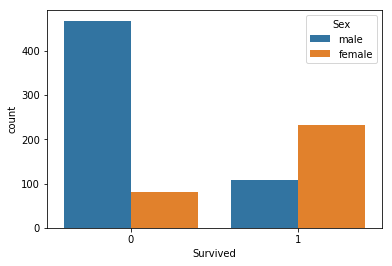

In [64]:
sns.countplot(x='Survived',data=train,hue='Sex')

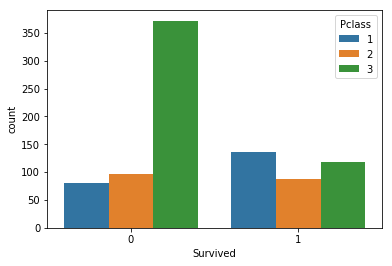

In [65]:
sns.countplot(x='Survived',data=train,hue='Pclass')

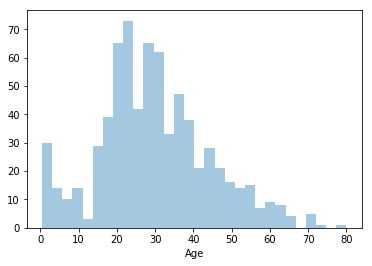

In [66]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

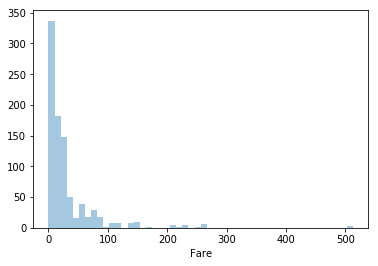

In [67]:
sns.distplot(train['Fare'].dropna(),kde=False,bins=50)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


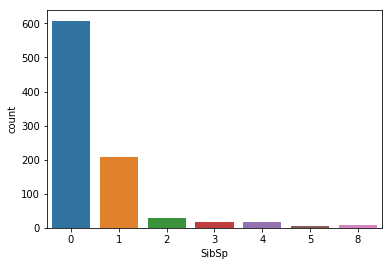

In [69]:
sns.countplot(x='SibSp',data=train)
#Most people did not have a spouse or a sibling

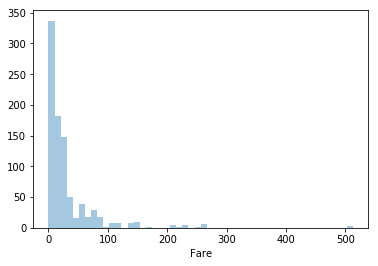

In [70]:
sns.distplot(train['Fare'].dropna(),kde=False,bins=50)

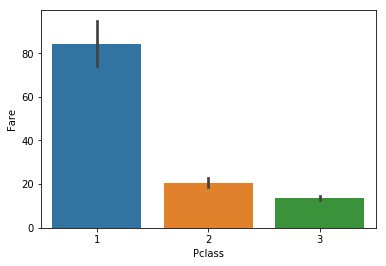

In [71]:
sns.barplot(x='Pclass',y='Fare',data=train)

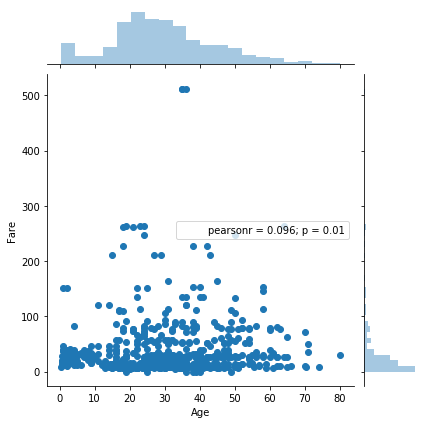

In [72]:
sns.jointplot(x=train['Age'],y=train['Fare'],kind='scatter')

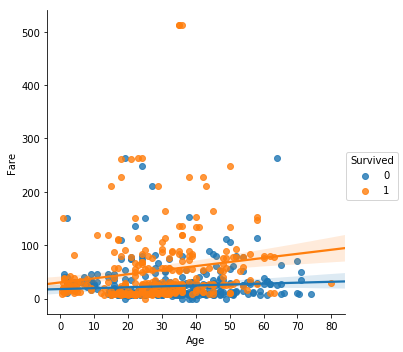

In [73]:
sns.lmplot(x='Age',y='Fare',hue='Survived',data=train)

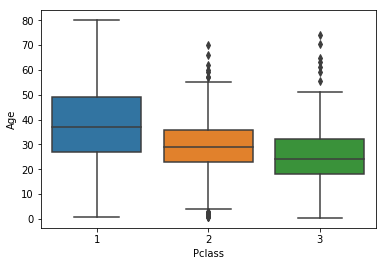

In [74]:
sns.boxplot(x="Pclass",y='Age',data=train)

In [75]:
meanage1 = train[train['Pclass']==1]['Age'].mean()
meanage2 = train[train['Pclass']==2]['Age'].mean()
meanage3 = train[train['Pclass']==3]['Age'].mean()

In [76]:
#We can compute age based on the class (really basic)
def impute_age(cols):
    
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        
        if pclass == 1:
            return  meanage1
        elif pclass == 2:
            return meanage2
        else:
            return meanage3
    
    else:
        
        return age


    

In [77]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [78]:
train.drop('Cabin',axis=1,inplace=True)

In [79]:
train.dropna(inplace=True)

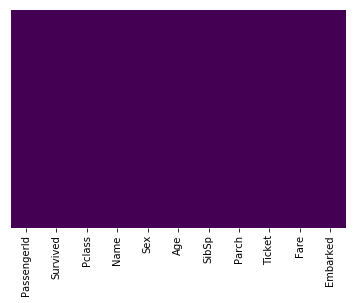

In [80]:
#Check where the missing data is
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
#Now we have no missing values
#Now need to encode dummy variables
sex = pd.get_dummies(train['Sex'],drop_first='True') #<- Creates catagories for this
#we want to prevent muticolinearity 

In [82]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [83]:
train = pd.concat([train,sex,embark],axis=1)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [85]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [86]:
train.drop('PassengerId',axis=1,inplace=True)

In [91]:
#Note that Pclass is treated as a continuous variable, which is not ideal. Might need to call 
#get dummies on this
classes = pd.get_dummies(train['Pclass'],drop_first=True)

In [93]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [94]:
from sklearn.cross_validation import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [98]:
from sklearn.linear_model import LogisticRegression

In [116]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.00000,0,0,7.775,0,0,1
651,2,18.00000,0,1,23.000,0,0,1
2,3,26.00000,0,0,7.925,0,0,1
690,1,31.00000,1,0,57.000,1,0,1
196,3,25.14062,0,0,7.750,1,1,0


In [99]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
predictions = logmodel.predict(X_test)

In [101]:
from sklearn.metrics import classification_report


In [102]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

In [112]:
#How good is the model at dealing with completeley new data?
test = pd.read_csv('titanic_test.csv')
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test.drop('Cabin',axis=1,inplace=True)
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test,sex_test,embark_test],axis=1)
test.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

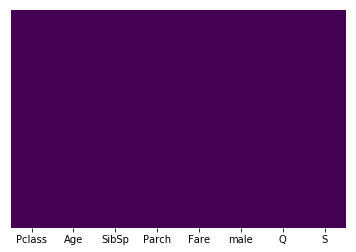

In [113]:
#Check where the missing data is
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

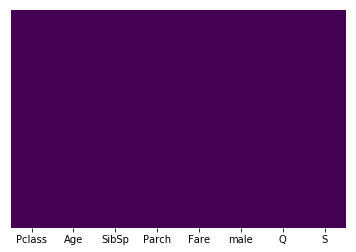

In [121]:
test.dropna(inplace=True)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [120]:
predictions2 = logmodel.predict(test)#Get the predictions of the model on this new data 